In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Đọc tệp CSV
input_data = pd.read_csv('input.csv')
labels = pd.read_csv('labels.csv')
input_test = pd.read_csv('input_test.csv')
labels_test = pd.read_csv('labels_test.csv')

In [3]:
# Hiển thị dữ liệu
print(input_data.head())
print(labels.head())
print(input_test.head())
print(labels_test.head())

   3.700000000000000000e+01  3.900000000000000000e+01  \
0                     131.0                     128.0   
1                      80.0                      92.0   
2                     149.0                     173.0   
3                     255.0                     254.0   
4                     111.0                     117.0   

   2.500000000000000000e+01  2.600000000000000000e+01  \
0                     135.0                     160.0   
1                      88.0                      83.0   
2                     151.0                     131.0   
3                     239.0                     253.0   
4                     117.0                     107.0   

   2.400000000000000000e+01  9.000000000000000000e+00  \
0                     157.0                     164.0   
1                      96.0                      89.0   
2                     153.0                     132.0   
3                     246.0                     228.0   
4                     113.0  

In [4]:
X_train = np.array(input_data)
Y_train = np.array(labels)
X_test = np.array(input_test)
Y_test = np.array(labels_test)

In [5]:
X_train = X_train.reshape(len(X_train), 100, 100,3) 
Y_train = Y_train.reshape(len(Y_train), 1)

In [6]:
X_test = X_test.reshape(len(X_test), 100, 100,3)
Y_test = Y_test.reshape(len(Y_test),1)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
print(X_train.shape)
print(X_test.shape)

(1999, 100, 100, 3)
(399, 100, 100, 3)


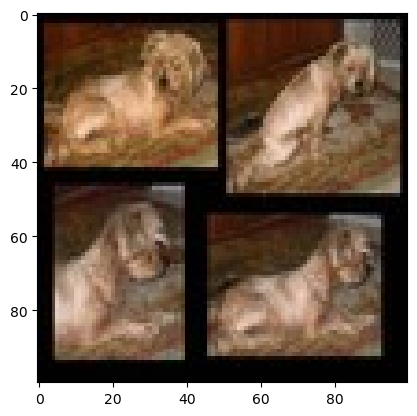

In [9]:
id1=random.randint(0,len(X_train))
plt.imshow(X_train[id1,:]) 
plt.show()

In [10]:
# Định nghĩa mô hình
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [11]:
optimizers = [Adam()]
optimizer_names = ['Adam']
accuracies = []

In [12]:
# Biên dịch và huấn luyện mô hình với từng thuật toán
for optimizer in optimizers:
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))
    # In kết quả
    loss, accuracy = model.evaluate(X_test, Y_test)
    accuracies.append(accuracy)
    print(f'Optimizer: {optimizer.get_config()["name"]}, Accuracy: {accuracy}')

C:\Users\ProTech Computer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.4916 - loss: 0.7843 - val_accuracy: 0.5589 - val_loss: 0.6929
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5111 - loss: 0.6931 - val_accuracy: 0.5990 - val_loss: 0.6874
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5398 - loss: 0.6899 - val_accuracy: 0.5940 - val_loss: 0.6891
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5509 - loss: 0.6886 - val_accuracy: 0.5013 - val_loss: 0.6925
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.5047 - loss: 0.6918 - val_accuracy: 0.5013 - val_loss: 0.6929
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.4920 - loss: 0.6933 - val_accuracy: 0.4987 - val_loss: 0.6939
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.5321 - loss: 0.6896 - val_accuracy: 0.5639 - val_loss: 0.6848
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5206 - loss: 0.6928 - val_accuracy: 0.5940 - v

In [13]:
# Lấy dữ liệu về độ chính xác và mất mát từ lịch sử huấn luyện
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [14]:
# Xác định số epoch
epochs = range(1, len(acc) + 1) 

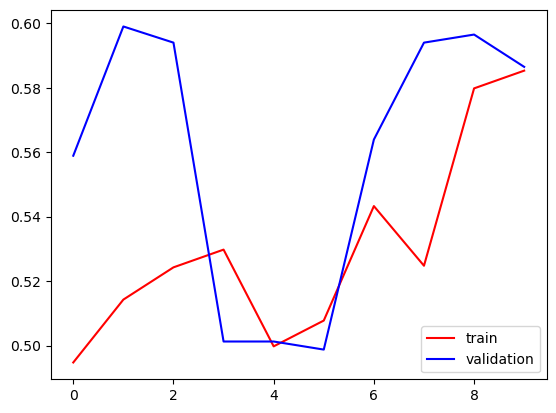

In [15]:
#Vẽ đồ thị: Đồ thị độ chính xác và mất mát của quá trình huấn luyện và kiểm tra
# Đồ thị này biểu diễn độ chính xác của mô hình trên tập huấn luyện (đường màu đỏ) 
# và tập kiểm tra (đường màu xanh) sau mỗi epoch. Độ chính xác là tỷ lệ giữa số lượng 
# dự đoán chính xác và tổng số lượng dự đoán. Mục tiêu là tối đa hóa độ chính xác.
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

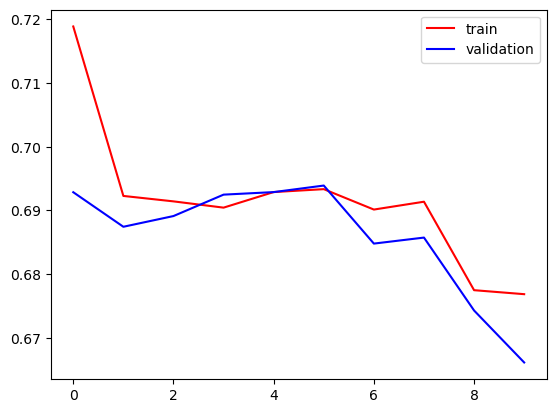

In [16]:
# Đồ thị này biểu diễn giá trị hàm mất mát của mô hình trên tập huấn luyện (đường màu đỏ) 
# và tập kiểm tra (đường màu xanh) sau mỗi epoch. 
# Giá trị hàm mất mát thể hiện mức độ sai lệch giữa kết quả dự đoán của mô hình 
# và giá trị thực tế. Mục tiêu là tối thiểu hóa giá trị hàm mất mát.
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
mô hình dự đoán là: dog


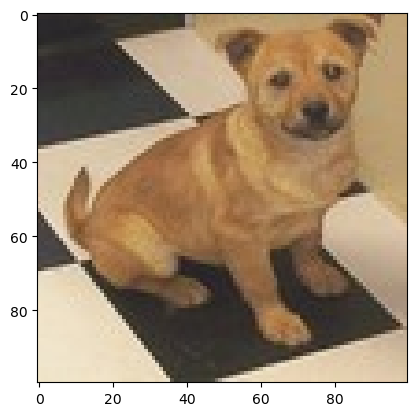

In [31]:
id2=random.randint(0,len(Y_test))
y_pred=model.predict(X_test[id2,:].reshape(1,100,100,3))
if(y_pred<0.5):
    pred ='dog'
else:
    pred ='cat'

print('mô hình dự đoán là:',pred)
plt.imshow(X_test[id2,:])
plt.show()

In [28]:
# Đánh giá mô hình trên tập kiểm thử
validation_loss, validation_acc = model.evaluate(X_test, Y_test)

print("Độ chính xác trên tập kiểm thử: {:.2f}%".format(validation_acc * 100))
print("Hàm mất mát trên tập kiểm thử: {:.2f}".format(validation_loss))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7812 - loss: 0.5942
Độ chính xác trên tập kiểm thử: 58.65%
Hàm mất mát trên tập kiểm thử: 0.67


In [19]:
# Dự đoán trên tập kiểm thử
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [20]:
# Tính toán các phép đo
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

In [21]:
#mô hình loại 
#Precision (Độ chính xác) 
#Recall (Độ phủ) 
#F1 Score (trung bình của Precision và Recall) 
#ROC AUC (Diện tích dưới đường cong ROC) 
print("Độ chính xác: {:.2f}".format(precision))
print("Độ phủ: {:.2f}".format(recall))
print("trung bình: {:.2f}".format(f1))
print("Diện tích: {:.2f}".format(roc_auc))

Độ chính xác: 0.77
Độ phủ: 0.25
trung bình: 0.38
Diện tích: 0.59
